## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("raw_seoul_bike_sharing.csv",parse_dates=['Date'])

In [3]:
df

,Date,RENTED_BIKE_COUNT,Hour,TEMPERATURE,HUMIDITY,WIND_SPEED,Visibility,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,Snowfall,SEASONS,HOLIDAY,FUNCTIONING_DAY
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   RENTED_BIKE_COUNT      8465 non-null   float64       
 2   Hour                   8760 non-null   int64         
 3   TEMPERATURE            8749 non-null   float64       
 4   HUMIDITY               8760 non-null   int64         
 5   WIND_SPEED             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   DEW_POINT_TEMPERATURE  8760 non-null   float64       
 8   SOLAR_RADIATION        8760 non-null   float64       
 9   RAINFALL               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  SEASONS                8760 non-null   object        
 12  HOLIDAY                8760 non-null   object        
 13  FUN

In [5]:
df.describe(include='all')

,Date,RENTED_BIKE_COUNT,Hour,TEMPERATURE,HUMIDITY,WIND_SPEED,Visibility,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,Snowfall,SEASONS,HOLIDAY,FUNCTIONING_DAY
count,8760,8465.00,8760.00,8749.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760,8760,8760
unique,365,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4,2,2
top,2018-05-21 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Spring,No Holiday,Yes
freq,24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2208,8328,8465
first,2017-01-12 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
last,2018-12-11 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
mean,NaN,729.16,11.50,12.87,58.23,1.72,1436.83,4.07,0.57,0.15,0.08,NaN,NaN,NaN
std,NaN,642.35,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44,NaN,NaN,NaN
min,NaN,2.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00,NaN,NaN,NaN
25%,NaN,214.00,5.75,3.40,42.00,0.90,940.00,-4.70,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
df.columns

Index(['Date', 'RENTED_BIKE_COUNT', 'Hour', 'TEMPERATURE', 'HUMIDITY', 'WIND_SPEED', 'Visibility', 'DEW_POINT_TEMPERATURE', 'SOLAR_RADIATION', 'RAINFALL', 'Snowfall', 'SEASONS', 'HOLIDAY', 'FUNCTIONING_DAY'], dtype='object')

In [7]:
df.columns = ['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioningday']

In [8]:
df

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,seasons,holiday,functioningday
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


## Data Visualization

### Univariate Data Exploration

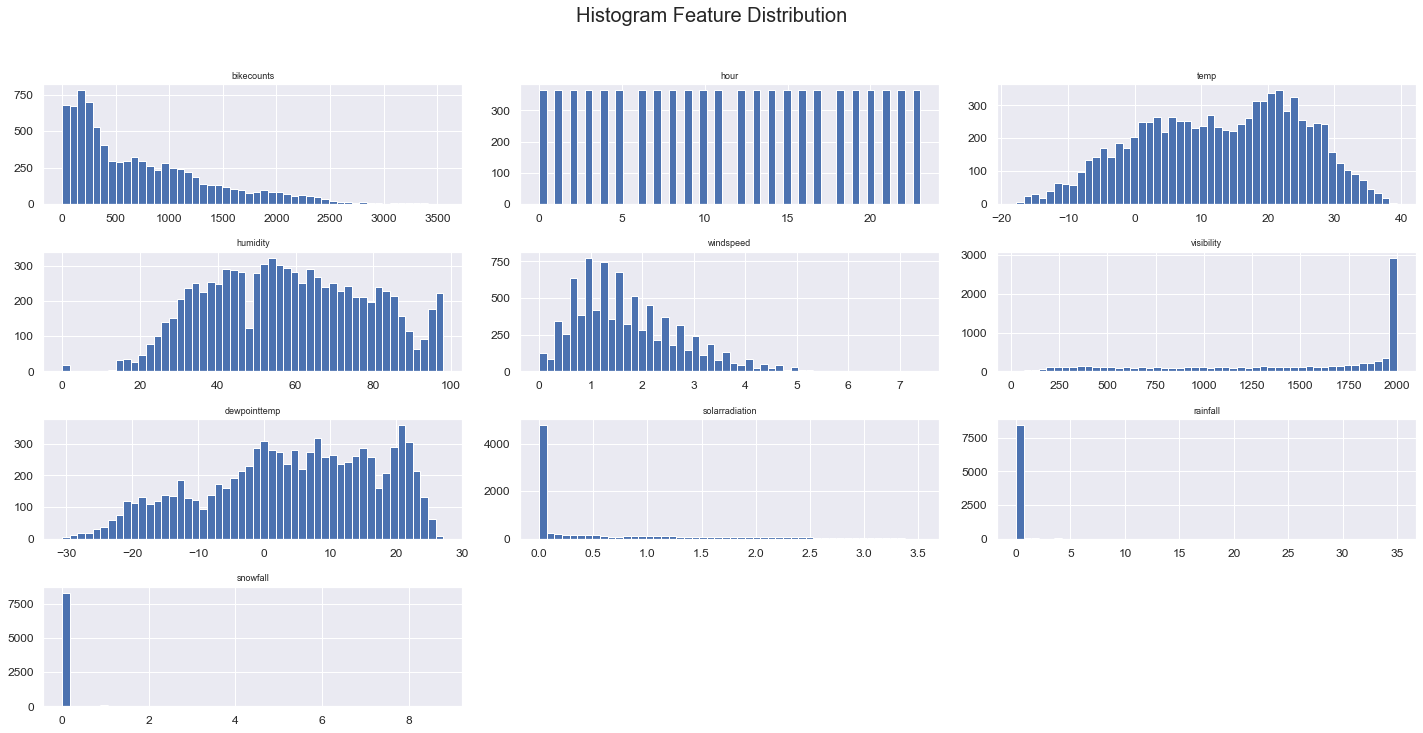

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

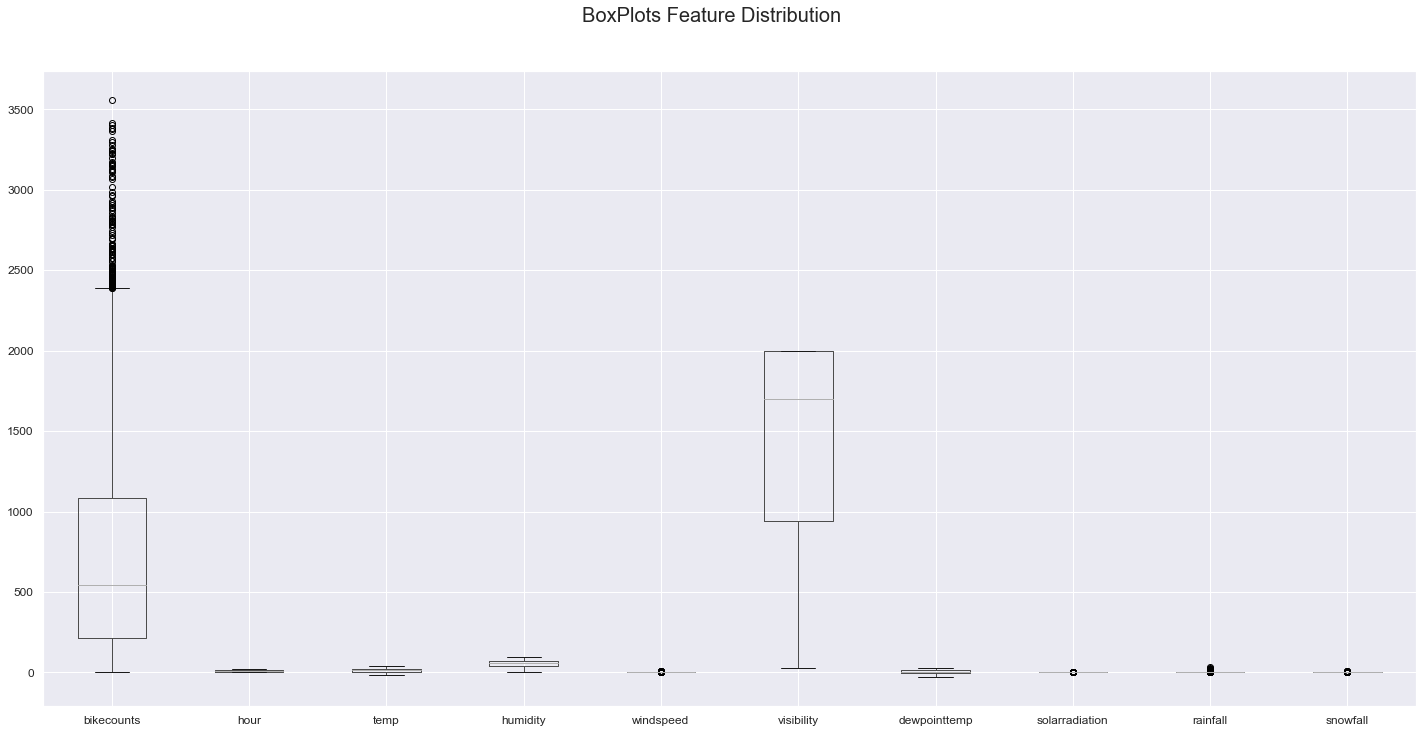

In [10]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Drop unwanted features

In [11]:
df.columns

Index(['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioningday'], dtype='object')

### Treat Missing Values

In [12]:
df.isnull().sum()

date                0
bikecounts        295
hour                0
temp               11
humidity            0
windspeed           0
visibility          0
dewpointtemp        0
solarradiation      0
rainfall            0
snowfall            0
seasons             0
holiday             0
functioningday      0
dtype: int64

In [13]:
df['bikecounts'].median()

542.0

In [14]:
df['bikecounts'] = df['bikecounts'].replace(np.nan,df['bikecounts'].median())

In [15]:
df['temp'].mean()

12.866887644302228

In [16]:
df['temp'] = df['temp'].replace(np.nan,12.86)

In [17]:
df.isnull().sum()

date              0
bikecounts        0
hour              0
temp              0
humidity          0
windspeed         0
visibility        0
dewpointtemp      0
solarradiation    0
rainfall          0
snowfall          0
seasons           0
holiday           0
functioningday    0
dtype: int64

### Treat Duplicate Values

In [18]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [19]:
df

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,seasons,holiday,functioningday
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


In [20]:
df['seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

In [21]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [22]:
df['functioningday'].value_counts()

Yes    8465
No      295
Name: functioningday, dtype: int64

### One-hot encoding

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8760 non-null   datetime64[ns]
 1   bikecounts      8760 non-null   float64       
 2   hour            8760 non-null   int64         
 3   temp            8760 non-null   float64       
 4   humidity        8760 non-null   int64         
 5   windspeed       8760 non-null   float64       
 6   visibility      8760 non-null   int64         
 7   dewpointtemp    8760 non-null   float64       
 8   solarradiation  8760 non-null   float64       
 9   rainfall        8760 non-null   float64       
 10  snowfall        8760 non-null   float64       
 11  seasons         8760 non-null   object        
 12  holiday         8760 non-null   object        
 13  functioningday  8760 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
me

In [24]:
df.columns

Index(['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioningday'], dtype='object')

In [25]:
df_cat = df[['seasons', 'holiday', 'functioningday']]

In [26]:
df_cat

,seasons,holiday,functioningday
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [27]:
df2_cat = pd.get_dummies(data=df_cat,drop_first=True)

In [28]:
df2_cat

,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,functioningday_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [29]:
df_num = df[['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall']]

In [30]:
df_num

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00


In [31]:
df3 = pd.concat([df_num,df2_cat],axis=1)

In [32]:
df3

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,functioningday_Yes
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,0,0,1,1,1
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,0,0,0,1,1
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,0,0,0,1,1
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,0,0,0,1,1
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,0,0,0,1,1


In [33]:
df3.columns

Index(['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter', 'holiday_No Holiday', 'functioningday_Yes'], dtype='object')

In [34]:
df3.columns = ['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 
               'spring', 'summer', 'winter', 'noholiday', 'functioningday']

In [35]:
df3

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,0,0,1,1,1
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,0,0,0,1,1
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,0,0,0,1,1
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,0,0,0,1,1
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,0,0,0,1,1


### Save to CSV

In [36]:
df3.to_csv("seoulbikesharingclean.csv", index=False)

#### Python code done by Dennis Lam